### 機械学習の総論

#### 1. 機械学習とは
- 機械学習の定義
- 機械学習の種類（教師あり学習、教師なし学習、強化学習）
- 機械学習の応用分野とその重要性

#### 2. データの分割
- トレーニングデータとテストデータ
- 検証データの必要性
- データ分割の方法（train_test_split関数の使用）

#### 3. モデルの学習
- モデルの定義と選択
- scikit-learnにおけるモデルの構築とフィッティング
- 過学習とアンダーフィッティングの概念

#### 4. 予測
- モデルによる予測の実行
- 予測結果の評価方法

#### 5. モデルの検証
- クロスバリデーションの必要性と方法
- 評価指標の選択（正解率、MSE、RMSEなど）
- scikit-learnを用いた評価方法の実装

### 乳がんデータセットを用いた分類

#### 1. データセットの概要
- 乳がんデータセットの説明
- 特徴量とターゲットの理解

#### 2. データの読み込みと前処理
- データの読み込み（pandasを使用）
- 欠損値の確認と処理
- データの標準化

#### 3. モデルの選択と学習
- 分類モデルの選択（例：ロジスティック回帰、サポートベクターマシン、ランダムフォレスト）
- モデルの学習とフィッティング

#### 4. モデルの評価
- 混同行列の作成
- ROC曲線とAUCの算出
- クロスバリデーションによるモデルの評価

#### 5. モデルのチューニング
- ハイパーパラメータのチューニング（グリッドサーチ、ランダムサーチ）
- 最適モデルの選定と再評価

### 糖尿病データセットを用いた回帰

#### 1. データセットの概要
- 糖尿病データセットの説明
- 特徴量とターゲットの理解

#### 2. データの読み込みと前処理
- データの読み込み（pandasを使用）
- 欠損値の確認と処理
- データの標準化

#### 3. モデルの選択と学習
- 回帰モデルの選択（例：線形回帰、Lasso回帰、ランダムフォレスト回帰）
- モデルの学習とフィッティング

#### 4. モデルの評価
- 評価指標の選択（MSE、RMSE、R²スコア）
- クロスバリデーションによるモデルの評価

#### 5. モデルのチューニング
- ハイパーパラメータのチューニング（グリッドサーチ、ランダムサーチ）
- 最適モデルの選定と再評価

### 総括と質疑応答

#### 1. 講義のまとめ
- 重要ポイントの再確認
- 具体的な応用例の紹介

#### 2. 質疑応答
- 学生からの質問に答える時間
- 補足説明や追加リソースの提供

[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC Score: 0.99737962659679


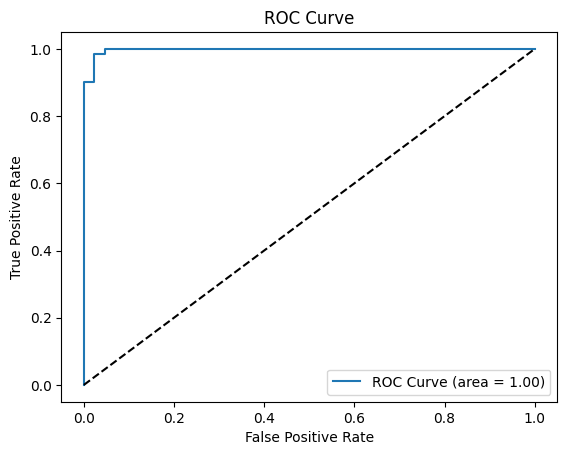

In [2]:
# 乳がんデータセットを用いた分類

# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# データセットの読み込み
data = load_breast_cancer()
X = data.data
y = data.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの選択と学習
model = LogisticRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 評価
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ROC曲線のプロット
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


Mean Squared Error: 2900.1936284934823
R² Score: 0.45260276297191926


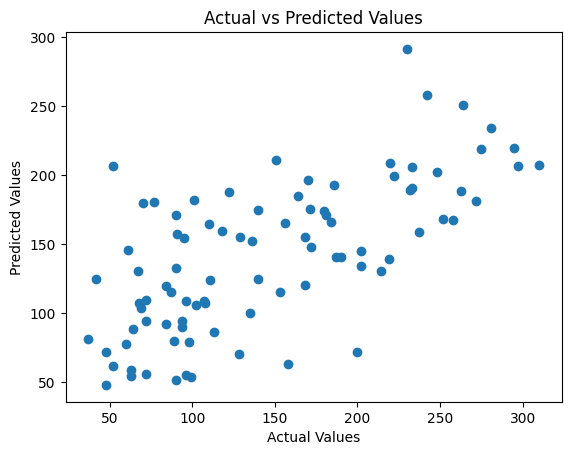

In [1]:
# 糖尿病データセットを用いた回帰

# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# データセットの読み込み
data = load_diabetes()
X = data.data
y = data.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの選択と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 評価
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 予測結果のプロット
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score: 0.99475925319358


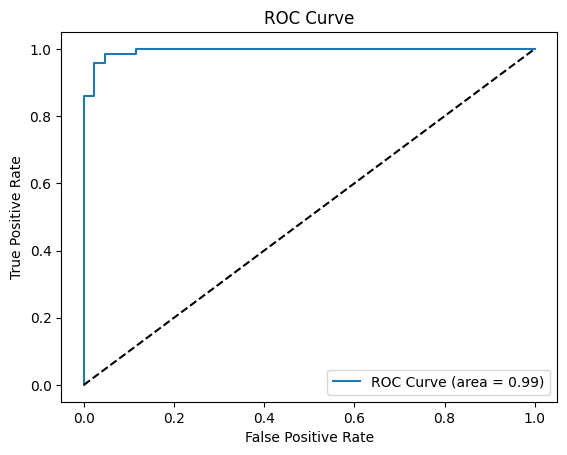

In [3]:
# 乳がんデータセットを用いた分類　Linear SVC

# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# データセットの読み込み
data = load_breast_cancer()
X = data.data
y = data.target

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの選択と学習
model = LinearSVC(dual=False)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 評価
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC AUC Scoreの計算はLinearSVCでは直接できないため、decision_functionを使用
y_pred_decision = model.decision_function(X_test)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_decision))

# ROC曲線のプロット
fpr, tpr, _ = roc_curve(y_test, y_pred_decision)
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % roc_auc_score(y_test, y_pred_decision))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

